In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import keras
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
DATADIR ="PH2Dataset/PH2.19/train/"
IMG_width = 300
IMG_hight = 200
training_data = []
X = []
y = []

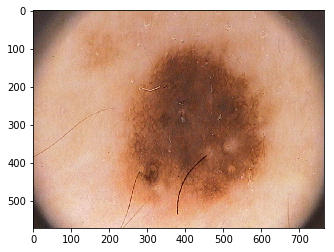

In [45]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# load an image from file
from keras.preprocessing.image import load_img
# load an image from file
CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
#CATEGORIES = ["melanoma","nevus",'seborrheic_keratosis']
#this section for testing join path succefully- shold apear an image after run it
for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)
    # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        image = load_img(path+'/'+img,target_size=(IMG_width, IMG_hight))
        plt.imshow(image)  # graph it
        plt.show()  # display!
        image = img_to_array(image)
        image = image.reshape((-1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
      
        break  # we just want one for now so break
    break  #...and one more!
    


In [43]:

def create_training_data():
    for category in CATEGORIES:  # do melanoma and nevi

        path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=melanoma 1=nevus

        for img in tqdm(os.listdir(path)):  # iterate over each image per melanoma and nevi
            try:
                image = load_img(path+'/'+img, target_size=(IMG_width, IMG_hight))
                image = img_to_array(image) 
                image = np.expand_dims(image, axis=0)
                image = preprocess_input(image)
                training_data.append([image, class_num])# add this to our training_data
               
            except Exception as e:  # in the interest in keeping the output clean...
                pass

            
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            #other way that i didnot find it helpfull for now..(:

create_training_data()

print(len(training_data))

import random
#3 = 70
random.seed(3)
random.shuffle(training_data)#because of our data is orgnized so we need it


for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized

100%|████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 346.90it/s]


200
1
0
0
0
0
1
1
0
1
1


In [44]:

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_width, IMG_hight, 3)
X1=[]


import pickle
'''
#save the image and label
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()'''